In [55]:
#importing libraries
import pandas as pd
import os
import glob
os.chdir("./")

    

# combining multiple csv files in one file #???


In [56]:


path = "./sales_data" # use your path
all_files = glob.glob("./sales_data" + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

all_data = pd.concat(li, axis=0, ignore_index=True)

all_data.to_csv("all data.csv")


In [57]:
#creating new data frame
df = pd.read_csv("all data.csv")
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [58]:
#df['Product'].value_counts()


# data cleaning

In [59]:
# deleting null values

In [60]:
df.isnull().sum()
df = df.dropna()


In [61]:
df.isna().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [62]:
#checking bcoz of error value
df.loc[df["Order Date"].str[0:2] == "Or"]

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...,...
185164,185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [63]:
#creating a new column which includes the month
#df['month'] = 3
####since the data contained or in month column we have to remove it from the data and the set
#the new dataframe equals to orignal one

df = df.loc[df['Order Date'].str[0:2]!='Or']



In [64]:
df['Month'] = df['Order Date'].str[0:2]

In [65]:
#df.loc[df["Month"] == "09"]

In [66]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [67]:
#convert month data type into an integer
df['Month'] = df['Month'].astype('int32')
#df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')
#df['Price Each'] = df['Price Each'].astype('float') #converted into float bcoz of decimals

In [68]:
#df.groupby(['Product']).count()

In [69]:
#add a sales columns
df['Sales'] = df['Quantity Ordered']* df['Price Each']

In [70]:
del df["Unnamed: 0"]


# which month was the best


In [71]:
results = df.groupby(['Month']).sum().sort_values(['Sales'], ascending = False)

In [72]:
results

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4.588415e+06,4.613443e+06
10,22703,3.715555e+06,3.736727e+06
4,20558,3.367671e+06,3.390670e+06
11,19798,3.180601e+06,3.199603e+06
5,18667,3.135125e+06,3.152607e+06
3,17005,2.791208e+06,2.807100e+06
7,16072,2.632540e+06,2.647776e+06
6,15253,2.562026e+06,2.577802e+06
8,13448,2.230345e+06,2.244468e+06


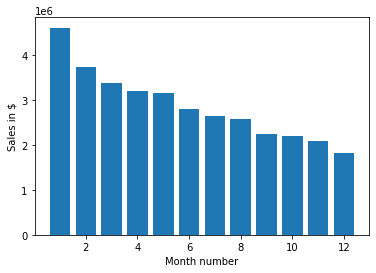

In [73]:
import matplotlib.pyplot as plt

months= range(1,13)

plt.bar(months, results['Sales'])
plt.xlabel("Month number")
plt.ylabel('Sales in $')
plt.show()


# what city sold the most product?

In [74]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [75]:
# using the .apply function to extract city column
######## important ####

df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

In [76]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [77]:
city_data = df.groupby(['City']).sum().sort_values(['Sales'], ascending = False)
city_data


,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
Austin,11153,1.809874e+06,69829,1.819582e+06


In [78]:
city = city_data.drop(['Price Each','Month'], axis = 1)
city.to_csv('City wise sales data.csv')
## Q2 ### december was the best month followed by november and April
## Q3 ### san francisco has the most sales followed by LA and then New York

# question 3 is what time do we display our advertisements


In [79]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [80]:
#creating time column using the .apply method #Method 1
#df['Time']= df['Order Date'].apply(lambda x: x.split(' ')[1])

In [81]:
#df['Hours']= df['Time'].apply(lambda x: x.split(':')[0])

In [82]:
#df['Time']= df['Order Date'].apply(lambda x: x.split(' ')[1])

In [83]:
#### Method 2 of creating a time column

In [84]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [185]:
# making hour and min column method 2
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute


In [170]:
hour_df = df.groupby(df['Hour']).sum()
hour_df = hour_df.drop(['Price Each','Month','Minute'], axis = 1).sort_values(['Sales'], ascending = 0)
hour_df

,Quantity Ordered,Sales
Hour,,
19,14470,2412938.54
12,14202,2316821.34
11,14005,2300610.24
20,13768,2281716.24
18,13802,2219348.30
13,13685,2155389.80
17,12229,2129361.61
14,12362,2083672.73
21,12244,2042000.86


In [190]:
#city_df = df.groupby(df['City']).sum()
#city_df = city_df.drop(['Price Each','Month','Minute'], axis = 1).sort_values(['Sales'], ascending = 0)
#city_df
#dftest = city_df['Sales']/city_df['Sales'].sum() * 100
#dftest

In [186]:
#city_df = df.groupby(df['City']).sum()
#city_df

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06,214264,442932
Austin,11153,1.809874e+06,69829,1.819582e+06,141946,289060
Boston,22528,3.637410e+06,141112,3.661642e+06,288225,590442
Dallas,16730,2.752628e+06,104620,2.767975e+06,214390,435155
Los Angeles,33289,5.421435e+06,208325,5.452571e+06,427444,866638
New York City,27932,4.635371e+06,175741,4.664317e+06,357696,733598
Portland,14053,2.307747e+06,87765,2.320491e+06,179632,368389
San Francisco,50239,8.211462e+06,315520,8.262204e+06,643265,1319477
Seattle,16553,2.733296e+06,104941,2.747755e+06,213292,436368




# Question 4 # What product are often sold most together


In [200]:
df[df['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
#df['text'] = df[['name','text','month']].groupby(['name','month'])['text'].transform(lambda x: ','.join(x))